## Week 3 Lab exercises

In this week we will explore the concept of object oreinted programming (OOP) with classes, and the numerical solution of simple non linear ordinary differential equations (ODEs). 

In [3]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 
I have written a class below for a Point object, which encapsulates the idea of a point and things we might want to do to it. 

Here you will write another class object for a Rectangle. You should consider and implement the following points:

1. What is the minimum information that is needed to fully describe a rectangle and its position in space? Assume for simplicity that its edges are aligned with the x and y axes.

2. Implement functions to:

    a. reflect the rectangle in the x and y axes
    
    b. grow the rectangle by an amount in x and y with the bottom left corner fixed
    
    c. grow the rectangle by an amount in x and y with the top right corner fixed
    
    d. plot the rectangle


3. What should be checked here? Can you add some asserts? Do you need to test the functions?

4. Would some of the methods needed make more sense to be implemented in the Points class instead of the Rectangle class? If so go ahead and edit it!

Point  P is 1.0 2.0
Point  Q is 4.0 7.5
Point  R is 5.0 9.5
Distance is  6.264982043070834
42


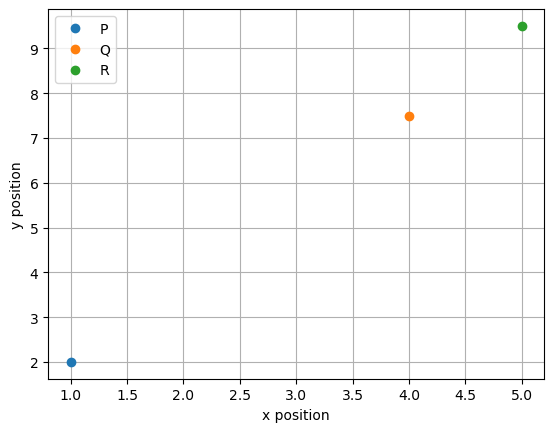

In [6]:
# Points class

class Point :
    """
    Represents a point in a 2D space
    
    attributes: x, y, name
    
    """
    
    # constructor function
    # The double underscores indicate a private method or variable
    # not to be accessed outside the class (in principle)
    def __init__(self, x=0.0, y=0.0, name = ""):
        self.x = x
        self.y = y
        self.name = name
        self.__private_variable = 42
        
    def __add__(self, other) :
        new_point = Point(self.x+other.x, self.y+other.y)
        return new_point
    
    def print_point(self) :
        print("Point ", self.name, "is", self.x, self.y)
        
    # Note that we don't use self here so don't need to pass it in
    # (This is a static function - it does not require an instance of the class)
    def calculate_distance_between_two_points(A, B) :
        return np.sqrt((A.x - B.x)**2.0 + (A.y - B.y)**2.0)
    
    def move_point(self,dx,dy) :
        self.x += dx
        self.y += dy
        
    def plot_point(self, ax) :
        ax.plot(self.x, self.y, 'o', label=self.name)
        
    def update_name(self, new_name) :
        self.name = new_name
        
        
# Some examples of using the Points class
first_point = Point(1.0,2.0,"P")
first_point.print_point()

second_point = Point(3.0,5.5,"Q")
second_point.move_point(1.0, 2.0)
second_point.print_point()

third_point = first_point + second_point
third_point.update_name("R")
third_point.print_point()

# Use the static function
distance = Point.calculate_distance_between_two_points(first_point,second_point)
print("Distance is ", distance)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_point.plot_point(ax)
second_point.plot_point(ax)
third_point.plot_point(ax)
plt.legend()

# Try to access the private variable, even though you shouldn't
#print(first_point.__private_variable) # This won't work - try uncommenting it
print(first_point._Point__private_variable) # This will

# Can get info on the new class - uncomment to see this
# Point?

Rectangle RECTANGLE is ( 1.0 2.0 ), and ( 6.0 2.0 ), and ( 1.0 5.0 ), and ( 6.0 5.0 )


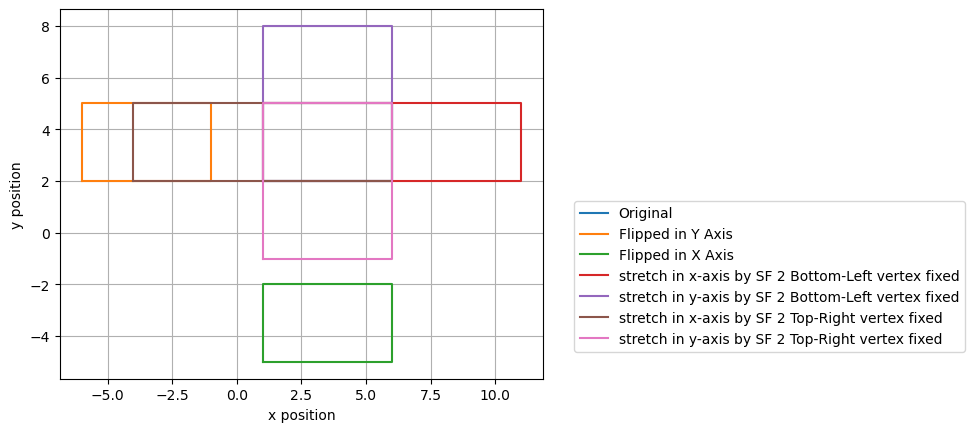

In [7]:
# Rectangle class

class Rectangle:
    def __init__(self, name, bottom_left_point=Point(), dx=0.0, dy=0.0):
        self.name = name
        self.bottom_left_point = bottom_left_point
        self.dx = dx
        self.dy = dy
        self.bottom_right_point = Point(self.bottom_left_point.x + self.dx, self.bottom_left_point.y, name="BR")
        self.top_left_point = Point(self.bottom_left_point.x, self.bottom_left_point.y + self.dy, name="TL")
        self.top_right_point = Point(self.bottom_left_point.x + self.dx, self.bottom_left_point.y + self.dy, name="TR")
        

    def print_rectangle(self) :
        print("Rectangle", self.name, "is (", 
               self.bottom_left_point.x, self.bottom_left_point.y, "), and (",
               self.bottom_right_point.x, self.bottom_right_point.y, "), and (",
               self.top_left_point.x, self.top_left_point.y, "), and (",
               self.top_right_point.x, self.top_right_point.y, ")")
    
    def reflect_rectangle_in_y_axis(self) :
        new_bottom_left_point = Point(-self.bottom_left_point.x - self.dx, self.bottom_left_point.y, "P reflected in y")
        new_rectangle = Rectangle( self.name + " reflected in y axis", new_bottom_left_point, self.dx, self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)

    def reflect_rectangle_in_x_axis(self) :
        new_bottom_left_point = Point(self.bottom_left_point.x, -self.bottom_left_point.y - self.dy, "P reflected in x")
        new_rectangle = Rectangle( self.name + " reflected in x axis", new_bottom_left_point, self.dx, self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)

    def stretch_rectangle_in_x_axis_with_bottom_left_vertex_fixed(self, scale_factor):
        new_bottom_left_point = Point(self.bottom_left_point.x, self.bottom_left_point.y, "P reflected in x")
        new_rectangle = Rectangle( self.name + f" stretched by a factor of {scale_factor} in x axis where the bottom-left vertex is fixed", new_bottom_left_point, scale_factor*self.dx, self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)   

    def stretch_rectangle_in_y_axis_with_bottom_left_vertex_fixed(self, scale_factor):
        new_bottom_left_point = Point(self.bottom_left_point.x, self.bottom_left_point.y, "P reflected in x")
        new_rectangle = Rectangle( self.name + f" stretched by a factor of {scale_factor} in y axis where the bottom-left vertex is fixed", new_bottom_left_point, self.dx, scale_factor*self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)

    def stretch_rectangle_in_x_axis_with_top_right_vertex_fixed(self, scale_factor):
        new_bottom_left_point = Point(self.bottom_left_point.x - (scale_factor -1)*self.dx, self.bottom_left_point.y, "P reflected in x")
        new_rectangle = Rectangle( self.name + f" stretched by a factor of {scale_factor} in x axis where the top-right vertex is fixed", new_bottom_left_point, scale_factor*self.dx, self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)

    def stretch_rectangle_in_y_axis_with_top_right_vertex_fixed(self, scale_factor):
        new_bottom_left_point = Point(self.bottom_left_point.x, self.bottom_left_point.y - (scale_factor -1)*self.dy, "P reflected in x")
        new_rectangle = Rectangle( self.name + f" stretched by a factor of {scale_factor} in y axis where the top-right vertex is fixed", new_bottom_left_point, self.dx, scale_factor*self.dy)
        return(new_rectangle)
        Rectangle.print_rectangle(new_rectangle)

    def plot_rectangle(self,ax):
        ax.plot(self.bottom_left_point.x, self.bottom_left_point.y, 'o', label=f"{self.name} Bottom-Left")
        ax.plot(self.top_left_point.x, self.top_left_point.y, 'o', label="Top-Left")
        ax.plot(self.top_right_point.x, self.top_right_point.y, 'o', label="Top-Right")
        ax.plot(self.bottom_right_point.x, self.bottom_right_point.y, 'o', label="Bottom-Right")

    def plot_rectangle2(self, ax, rectangle_label="") :
        
        x_points = np.array([self.bottom_left_point.x, self.bottom_left_point.x,
                             self.top_right_point.x,   self.top_right_point.x,
                             self.bottom_left_point.x])
        
        y_points = np.array([self.bottom_left_point.y, self.top_right_point.y,
                             self.top_right_point.y,   self.bottom_left_point.y,
                             self.bottom_left_point.y])
        
        ax.plot(x_points, y_points, '-', label=rectangle_label)
        ax.set_aspect('equal')
        
        
first_rectangle=Rectangle("RECTANGLE", Point(1.0, 2.0, "P"), 5.0, 3.0)

first_rectangle.print_rectangle()

#Rectangle.stretch_rectangle_in_x_axis_with_top_right_vertex_fixed(first_rectangle, 3.0)

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
first_rectangle.plot_rectangle2(ax, "Original")
first_rectangle.reflect_rectangle_in_y_axis().plot_rectangle2(ax, "Flipped in Y Axis")
first_rectangle.reflect_rectangle_in_x_axis().plot_rectangle2(ax, "Flipped in X Axis")
first_rectangle.stretch_rectangle_in_x_axis_with_bottom_left_vertex_fixed(2).plot_rectangle2(ax, f"stretch in x-axis by SF 2 Bottom-Left vertex fixed")
first_rectangle.stretch_rectangle_in_y_axis_with_bottom_left_vertex_fixed(2).plot_rectangle2(ax, f"stretch in y-axis by SF 2 Bottom-Left vertex fixed")
first_rectangle.stretch_rectangle_in_x_axis_with_top_right_vertex_fixed(2).plot_rectangle2(ax, f"stretch in x-axis by SF 2 Top-Right vertex fixed")
first_rectangle.stretch_rectangle_in_y_axis_with_top_right_vertex_fixed(2).plot_rectangle2(ax, f"stretch in y-axis by SF 2 Top-Right vertex fixed")
plt.legend(bbox_to_anchor=(1.05, 0.5))





    

### ACTIVITY 2: 

Now create a Square class that has the same functionality as the rectangle class, but that in addition has the ability to calculate its own area. You are not allowed to modify the Rectangle class.

_HINT: Do you really need to write a whole new function from scratch? What about inheritance?_


Rectangle Square is ( 1.0 2.0 ), and ( 6.0 2.0 ), and ( 1.0 7.0 ), and ( 6.0 7.0 )
The area of Rectangle Square is 25.0 square units.


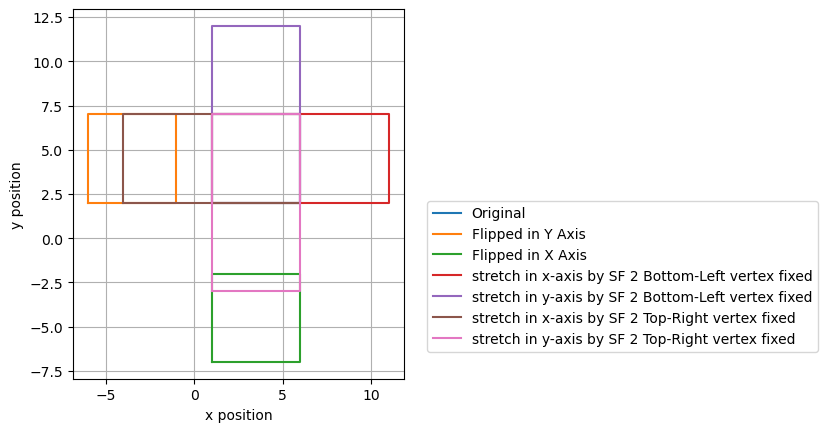

In [28]:
# Square class

class Square(Rectangle):
    def __init__ (self, name, bottom_left_point=Point(), dx=0.0, dy=0.0):
        self.name=name
        self.name = name
        self.bottom_left_point = bottom_left_point
        self.dx = dx
        self.dy = dx
        self.bottom_right_point = Point(self.bottom_left_point.x + self.dx, self.bottom_left_point.y, name="BR")
        self.top_left_point = Point(self.bottom_left_point.x, self.bottom_left_point.y + self.dy, name="TL")
        self.top_right_point = Point(self.bottom_left_point.x + self.dx, self.bottom_left_point.y + self.dy, name="TR")

    def find_area(self):
        print(f"The area of Rectangle {self.name} is {self.dx*self.dy} square units.")

square_rectangle=Square("Square", Point(1.0, 2.0, "P"), 5.0)

square_rectangle.print_rectangle()
square_rectangle.find_area()

plt.plot()
plt.grid()
plt.xlabel("x position")
plt.ylabel("y position")
ax = plt.gcf().gca()
square_rectangle.plot_rectangle2(ax, "Original")
square_rectangle.reflect_rectangle_in_y_axis().plot_rectangle2(ax, "Flipped in Y Axis")
square_rectangle.reflect_rectangle_in_x_axis().plot_rectangle2(ax, "Flipped in X Axis")
square_rectangle.stretch_rectangle_in_x_axis_with_bottom_left_vertex_fixed(2).plot_rectangle2(ax, f"stretch in x-axis by SF 2 Bottom-Left vertex fixed")
square_rectangle.stretch_rectangle_in_y_axis_with_bottom_left_vertex_fixed(2).plot_rectangle2(ax, f"stretch in y-axis by SF 2 Bottom-Left vertex fixed")
square_rectangle.stretch_rectangle_in_x_axis_with_top_right_vertex_fixed(2).plot_rectangle2(ax, f"stretch in x-axis by SF 2 Top-Right vertex fixed")
square_rectangle.stretch_rectangle_in_y_axis_with_top_right_vertex_fixed(2).plot_rectangle2(ax, f"stretch in y-axis by SF 2 Top-Right vertex fixed")
plt.legend(bbox_to_anchor=(1.05, 0.5))
    

### ACTIVITY 3:

Now we wil consider a simpled coupled ODEs: the Lotka-Volterra equations describe predator-prey relations, where some species $x$ (e.g. a fox) eats another species $y$ (e.g. rabbits), and each population grows by breeding at a rate proportional to its number. The resulting evolution is described by the following first order, autonomous, non linear, coupled system of ordinary differential equations:

$\frac{dx}{dt} = ax - bxy$

$\frac{dy}{dt} = -cy + dxy$

What parts or features of the differential equation tell us that it is:
1. First order - if a DE only has single derivatives 
2. Autonomous - if a DE does not explicitly depend on time
3. Non linear - if a DE has a term of order two or more
4. Coupled - if a system of DEs has dependent variables of y in x and vice versa.

Answers: ... UPDATE ME!

### ACTIVITY 4:

The following code solves the Logistic Equation 

$\frac{dy}{dt} = y (1 - y)$

Using a simple explicit integration and the scipy function solve_ivp() which used Runge-Kutta 4th/5th order time integration. Copy it and update it to solve instead the Lotka-Volterra equations. 

Note the following:

1. Why do I substract delta_t when calculating the vector of t_solution points? For each step in the integration process
2. the solve_ivp method uses the labels t and y for the independent and dependent variables. The y value is assumed to be a vector, allowing you to solve for multiple dependent variables at once, e.g. you can make it np.array([x,y])

C:\Users\blam9\AppData\Local\Temp\ipykernel_25388\2937276196.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_solution[0] = y0


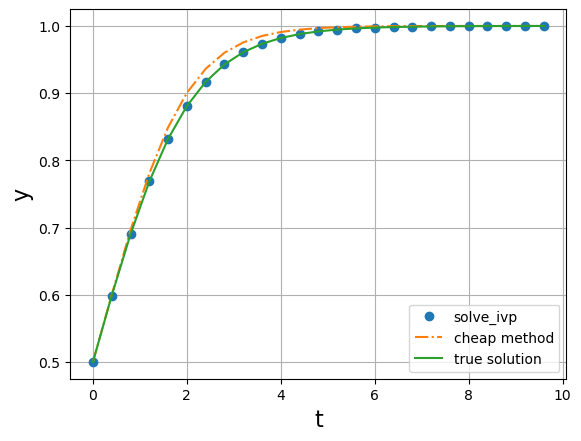

In [31]:
# Solve the 1d logistic equation from class
from scipy.integrate import solve_ivp

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dx/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 25
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([0.5]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_logistic_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'o', label="solve_ivp")

# Now do it the "cheap" way 
# increase the number of steps to see how the solution changes
y_solution = np.zeros_like(t_solution)
y_solution[0] = y0
for itime, time in enumerate(t_solution) :
    if itime > 0 :
        dydt = calculate_logistic_dydt(time, y_solution[itime-1])
        y_solution[itime] = y_solution[itime-1] + dydt * delta_t
    
plt.plot(t_solution, y_solution, '-.',label="cheap method")

# Now plot the true solution
A = 1.0/y0 - 1.0
y_true = 1.0 / (1.0 + A * np.exp(-t_solution))
plt.plot(t_solution, y_true, '-', label="true solution")
plt.legend(loc='best');

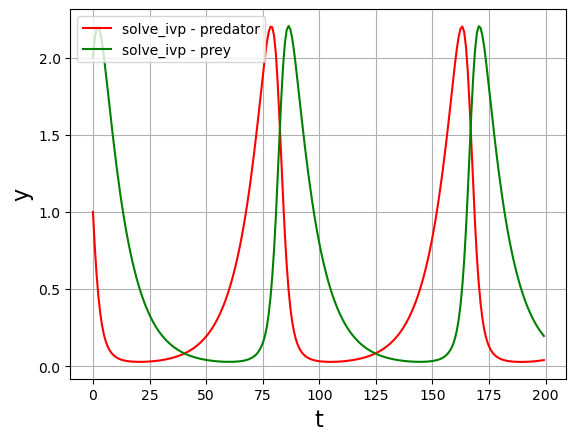

In [57]:
# Your solution here for the predator-prey equations !

from scipy.integrate import solve_ivp

#fix alpha and beta
a = 0.1 #first parameter
b = 0.2 #second parameter

#fix gamma and delta
c = 0.1 #third parameter
d = 0.2 #fourth parameter

# Note that the function has to take t as the first argument and y as the second




def calculate_equation_dydt(t, y):
    """Returns the gradient dy/dt for the second equation"""
    dydt = np.zeros_like(y)
    dydt = np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1]-c*y[1]])
    return dydt

max_time = 200.0
N_time_steps = 250
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([1,2]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_equation_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("t", fontsize=16)
plt.ylabel("y", fontsize=16) 
plt.plot(solution.t, solution.y[0], 'r-', label="solve_ivp - predator")
plt.plot(solution.t, solution.y[1], 'g-', label="solve_ivp - prey")
plt.legend(loc='best');


# UPDATE ME!

### ACTIVITY 5:

Find the equilibrium value of rabbits and foxes such that you do not get oscillations.

_HINT: You can do this by trying different initial values of the rabbits and foxes, but it may help to also plot the solutions of x versus y for different values of the initial conditions and identify if there is a trend_

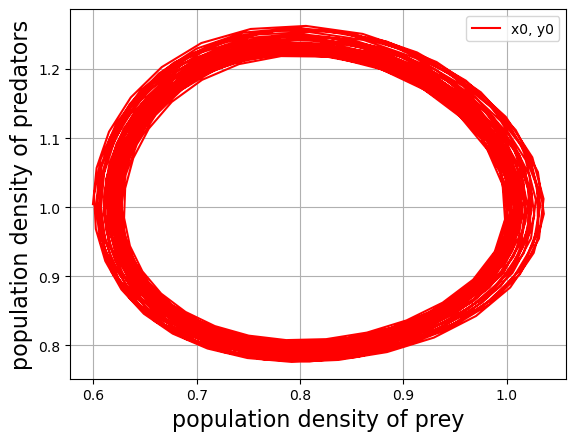

In [30]:
# Plot some solutions of x versus y

# Your solution here for the predator-prey equations !

from scipy.integrate import solve_ivp


#maybe a ofr loop?!?!
#fix alpha and beta
a = 0.5 #first parameter
b = 0.5 #second parameter

#fix gamma and delta
c = 0.4 #third parameter
d = 0.5 #fourth parameter

# Note that the function has to take t as the first argument and y as the second

def calculate_equation_dydt(t, y):
    """Returns the gradient dy/dt for the second equation"""
    dydt = np.zeros_like(y)
    dydt = np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1]-c*y[1]])
    return dydt

max_time = 500.0
N_time_steps = 1000
delta_t = max_time / N_time_steps
t_solution = np.linspace(0.0, max_time-delta_t, N_time_steps) # values of independent variable 
y0 = np.array([1,1]) # an initial condition, y(0) = y0, note it needs to be an array

solution = solve_ivp(calculate_equation_dydt, [0,max_time], y0,
                        method='RK45', t_eval=t_solution)
 
plt.grid()
plt.xlabel("population density of prey", fontsize=16)
plt.ylabel("population density of predators", fontsize=16) 
plt.plot(solution.y[0], solution.y[1], 'r-', label="x0, y0")
plt.legend(loc='best');


# UPDATE ME!


# HINT: plt.plot(solution.y[0], solution.y[1], '--', label="x0, y0 = ??")

### ACTIVITY 6:

If you double the resolution in the simple integrator, what happens to the error in the solution compared to solve_ivp? Why? How could you improve this behaviour?

In [119]:
# Compare the errors here

# HINT: plt.plot(solution.t, solution.y[0] - y_solution, '--', label="error versus solve_ivp, dt = ??")

### ACTIVITY 7:

The predator - prey equations have been cast above in a _functional coding_ style. Can you imagine a way to cast them in a more OOP way?

_HINT: There are several ways this could be done, but consider writing an Ecosystem class - what would be the attributes and methods that would live in such a class?_

OPTIONAL: Implement it!

A: UPDATE ME!

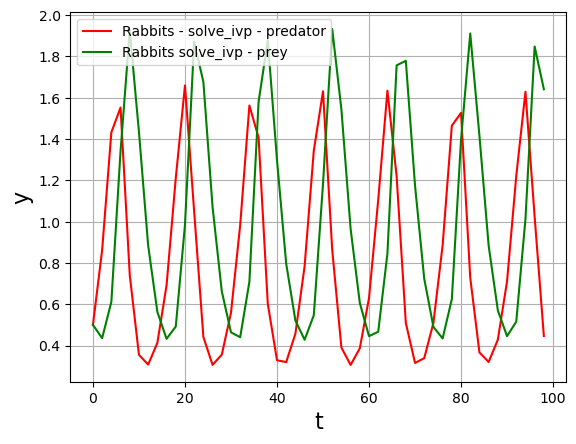

In [64]:
# Implementation of the Ecosystem class (OPTIONAL)

class Ecosystem:
        def __init__(self, name, initial_prey_pred_pop_densities=[0.0, 0.0], initial_parameters=[0.0, 0.0, 0.0, 0.0]):
            self.name=name
            self.initial_prey_pred_pop_densities=initial_prey_pred_pop_densities
            self.initial_parameters=initial_parameters

        def plot_lotka_volterra_equations_dydt(self, max_time, time_steps):
            """Returns the gradient dy/dt for the Lotka-Volterra equations"""
            dynamics = self.initial_prey_pred_pop_densities
            dydt = np.zeros_like(dynamics)
            dydt = np.array([self.initial_parameters[0]*dynamics[0]
                             -self.initial_parameters[1]*dynamics[0]
                             *dynamics[1], self.initial_parameters[3]*dynamics[0]
                             *dynamics[1]-self.initial_parameters[2]*dynamics[1]])
            
            delta_t = max_time / time_steps
            t_solution = np.linspace(0.0, max_time-delta_t, time_steps) # values of independent variable 

            solution = solve_ivp(calculate_equation_dydt, [0,max_time], self.initial_prey_pred_pop_densities,
                        method='RK45', t_eval=t_solution)
 
            plt.grid()
            plt.xlabel("t", fontsize=16)
            plt.ylabel("y", fontsize=16) 
            plt.plot(solution.t, solution.y[0], 'r-', label=f"{self.name} - solve_ivp - predator")
            plt.plot(solution.t, solution.y[1], 'g-', label=f"{self.name} solve_ivp - prey")
            plt.legend(loc='best');

rabbit_v_fox=Ecosystem("Rabbits", [0.5, 0.5], [0.1, 0.2, 0.1, 0.2])   

rabbit_v_fox.plot_lotka_volterra_equations_dydt(100, 50)
    
    
